In [1]:
import quandl
import pandas as pd

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2022-01-01')

In [3]:
aapl = quandl.get('WIKI/AAPL.11',start_date = start, end_date = end)
csco = quandl.get('WIKI/CSCO.11',start_date = start, end_date = end)
ibm = quandl.get('WIKI/IBM.11',start_date = start, end_date = end)
amzn = quandl.get('WIKI/AMZN.11',start_date = start, end_date = end)

In [4]:
for stock_df in (aapl, csco, ibm, amzn):
    stock_df["Normalized Return"] = stock_df["Adj. Close"]/stock_df.iloc[0,0]
    


In [5]:
#30% in aapl
#20% in csco
#40% in amazon
#10% in ibm

for stock_df, allo in zip((aapl, csco, ibm, amzn),[.3,.2,.4,.1]):
    stock_df["Allocation"] = stock_df['Normalized Return'] * allo

In [6]:
for stock_df in (aapl, csco, ibm, amzn):
    stock_df["Position Values"] = stock_df['Allocation'] * 1000000

In [7]:
all_pos_vals = [aapl['Position Values'], csco['Position Values'], ibm['Position Values'],amzn['Position Values']]


port_val = pd.concat(all_pos_vals, axis =1)
port_val.columns = ["AAPL Pos Vals","CSCO Pos Vals","IBM Pos Vals","AMZN Pos Vals"]

In [8]:
port_val

,AAPL Pos Vals,CSCO Pos Vals,IBM Pos Vals,AMZN Pos Vals
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166
...,...,...,...,...
2018-03-21,972226.673969,567446.158939,397744.940688,883572.585600
2018-03-22,958460.984214,551566.374757,386068.211304,862481.148411
2018-03-23,936293.966278,543242.294339,377945.269124,835368.374016


In [9]:
port_val["Total Position"] = port_val["AAPL Pos Vals"] + port_val["CSCO Pos Vals"]+ port_val["IBM Pos Vals"]+port_val["AMZN Pos Vals"]

In [10]:
port_val

,AAPL Pos Vals,CSCO Pos Vals,IBM Pos Vals,AMZN Pos Vals,Total Position
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06
...,...,...,...,...,...
2018-03-21,972226.673969,567446.158939,397744.940688,883572.585600,2.820990e+06
2018-03-22,958460.984214,551566.374757,386068.211304,862481.148411,2.758577e+06
2018-03-23,936293.966278,543242.294339,377945.269124,835368.374016,2.692850e+06


<AxesSubplot:xlabel='Date'>

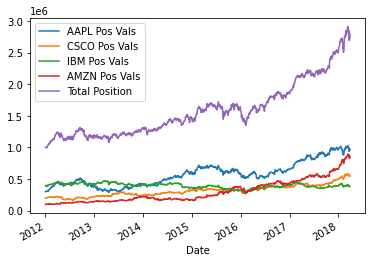

In [11]:
port_val.plot()

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'My Money')

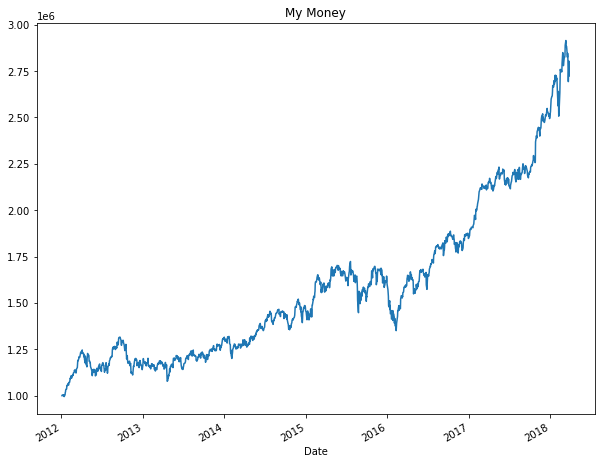

In [13]:
port_val["Total Position"].plot(figsize=(10,8))
plt.title("My Money")

In [14]:
port_val["Daily Returns"] = port_val["Total Position"].pct_change(1)

In [15]:
port_val

,AAPL Pos Vals,CSCO Pos Vals,IBM Pos Vals,AMZN Pos Vals,Total Position,Daily Returns
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487
...,...,...,...,...,...,...
2018-03-21,972226.673969,567446.158939,397744.940688,883572.585600,2.820990e+06,-0.008665
2018-03-22,958460.984214,551566.374757,386068.211304,862481.148411,2.758577e+06,-0.022125
2018-03-23,936293.966278,543242.294339,377945.269124,835368.374016,2.692850e+06,-0.023826


<AxesSubplot:ylabel='Frequency'>

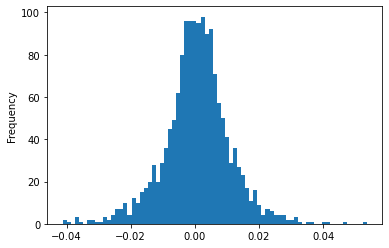

In [16]:
port_val["Daily Returns"].plot(kind = "hist", bins = 75)

<AxesSubplot:ylabel='Density'>

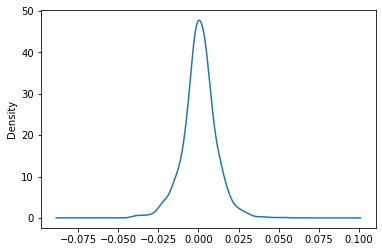

In [17]:
port_val["Daily Returns"].plot(kind = "kde")

In [18]:
port_val

,AAPL Pos Vals,CSCO Pos Vals,IBM Pos Vals,AMZN Pos Vals,Total Position,Daily Returns
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487
...,...,...,...,...,...,...
2018-03-21,972226.673969,567446.158939,397744.940688,883572.585600,2.820990e+06,-0.008665
2018-03-22,958460.984214,551566.374757,386068.211304,862481.148411,2.758577e+06,-0.022125
2018-03-23,936293.966278,543242.294339,377945.269124,835368.374016,2.692850e+06,-0.023826


In [19]:
port_val

,AAPL Pos Vals,CSCO Pos Vals,IBM Pos Vals,AMZN Pos Vals,Total Position,Daily Returns
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487
...,...,...,...,...,...,...
2018-03-21,972226.673969,567446.158939,397744.940688,883572.585600,2.820990e+06,-0.008665
2018-03-22,958460.984214,551566.374757,386068.211304,862481.148411,2.758577e+06,-0.022125
2018-03-23,936293.966278,543242.294339,377945.269124,835368.374016,2.692850e+06,-0.023826


In [20]:
port_val.pct_change(1).mean()

AAPL Pos Vals     0.000864
CSCO Pos Vals     0.000738
IBM Pos Vals      0.000045
AMZN Pos Vals     0.001528
Total Position    0.000694
Daily Returns          inf
dtype: float64

In [21]:
port_val.loc[:,'AAPL Pos Vals':'AMZN Pos Vals'].pct_change(1).mean()

AAPL Pos Vals    0.000864
CSCO Pos Vals    0.000738
IBM Pos Vals     0.000045
AMZN Pos Vals    0.001528
dtype: float64

In [22]:
import numpy as np

log_ret = np.log(port_val.loc[:,'AAPL Pos Vals':'AMZN Pos Vals']/port_val.loc[:,'AAPL Pos Vals':'AMZN Pos Vals'].shift(1))

In [23]:
log_ret

,AAPL Pos Vals,CSCO Pos Vals,IBM Pos Vals,AMZN Pos Vals
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428
...,...,...,...,...
2018-03-21,-0.022915,-0.001353,0.003132,-0.002935
2018-03-22,-0.014260,-0.028384,-0.029797,-0.024160
2018-03-23,-0.023399,-0.015207,-0.021265,-0.031940


In [24]:
log_ret.agg({"AAPL Pos Vals": np.mean,"IBM Pos Vals": np.sum})

AAPL Pos Vals    0.000726
IBM Pos Vals    -0.036635
dtype: float64

In [25]:
weights = np.array(np.random.random(4))
weights = np.array([x/sum(weights) for x in weights])

In [26]:
exp_return = np.sum( (log_ret.mean() * weights)* 252)

In [27]:
exp_return

0.18675436654733052

In [28]:
exp_volatility = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

In [29]:
exp_volatility

0.16964303446780013

In [30]:
SR = exp_return/exp_volatility

In [31]:
SR

1.1008666941923766

In [32]:
weights_array = pd.DataFrame(np.array(np.random.rand(1000,4)))

In [33]:
weights_array

,0,1,2,3
0,0.538180,0.247971,0.919636,0.932248
1,0.093084,0.973112,0.285371,0.481462
2,0.010522,0.586599,0.650797,0.016600
3,0.772101,0.485094,0.239854,0.860840
4,0.643774,0.629047,0.457908,0.710146
...,...,...,...,...
995,0.719075,0.193645,0.285925,0.238994
996,0.665610,0.008558,0.222301,0.253284
997,0.277105,0.590525,0.277773,0.732011
998,0.748440,0.132988,0.452166,0.333559


In [34]:
weights_array = pd.DataFrame(np.array(np.random.rand(5000,4)))
results_array = pd.DataFrame(np.ones((1000,7)))
results_array.columns = ["AAPL","CSCO","IBM","AMZN", "Returns","Volatility","Sharpe"]

for index, row in weights_array.iterrows():
    
    weights = np.array([x/sum(row) for x in row])
    exp_volatility = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    exp_return = np.sum( (log_ret.mean() * weights)* 252)
    results_array.loc[index,'AAPL'] = weights[0]
    results_array.loc[index,'CSCO'] =weights[1]
    results_array.loc[index,'IBM'] =weights[2]
    results_array.loc[index,'AMZN'] =weights[3]
    results_array.loc[index,'Returns'] = exp_return
    results_array.loc[index,'Volatility'] = exp_volatility
    results_array.loc[index,'Sharpe'] = exp_return/exp_volatility
    

In [35]:
results_array.sort_values(by='Sharpe', ascending = False)

,AAPL,CSCO,IBM,AMZN,Returns,Volatility,Sharpe
943,0.247637,0.207669,0.005401,0.539293,0.263199,0.205735,1.279312
3947,0.280054,0.232966,0.004790,0.482190,0.253706,0.198638,1.277230
1299,0.304156,0.164154,0.000444,0.531246,0.263776,0.206736,1.275905
1327,0.295029,0.186196,0.009106,0.509669,0.258246,0.202744,1.273751
1638,0.278021,0.200211,0.016023,0.505745,0.256020,0.201225,1.272310
...,...,...,...,...,...,...,...
1234,0.024275,0.160296,0.776374,0.039055,0.039145,0.168073,0.232907
123,0.027149,0.141690,0.791099,0.040063,0.036919,0.168700,0.218842
2948,0.014671,0.168551,0.789404,0.027374,0.034655,0.169495,0.204460
2252,0.093658,0.047079,0.834215,0.025048,0.028392,0.170476,0.166542


In [36]:
results_array.Sharpe.max()

1.2793121362015925

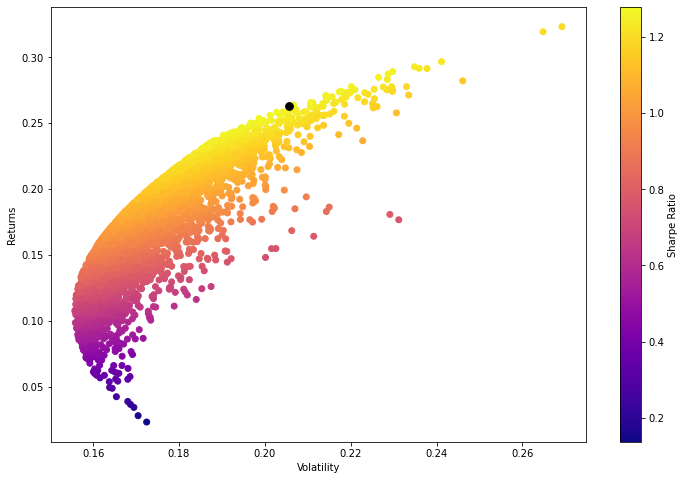

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(results_array.Volatility,results_array.Returns,c=results_array.Sharpe,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')

plt.scatter(results_array.Volatility[results_array.Sharpe.argmax()],results_array.Returns[results_array.Sharpe.argmax()],c='black',s=60) #Max Sharp Ratio

In [38]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret / vol
    return np.array([ret,vol,sr])


In [39]:
from scipy.optimize import minimize



In [40]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]*-1

In [41]:
def check_sum(weights):
    return np.sum(weights) - 1

In [42]:
cons = ({'type':'eq', 'fun':check_sum})

In [43]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [44]:
init_guess = [0.25,0.25,0.25,0.25]

In [45]:
opt_results = minimize(neg_sharpe,init_guess,method ='SLSQP',bounds=bounds,constraints = cons)

In [46]:
opt_results

     fun: -1.2828472170981198
     jac: array([-0.00072455, -0.00049011,  0.47258657,  0.0005457 ])
 message: 'Optimization terminated successfully'
    nfev: 31
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.22984623, 0.24494367, 0.        , 0.5252101 ])

In [47]:
opt_results.x

array([0.22984623, 0.24494367, 0.        , 0.5252101 ])

In [48]:
get_ret_vol_sr(opt_results.x)

array([0.261193  , 0.20360414, 1.28284722])

In [49]:
frontier_y = np.linspace(0,0.3,100)

In [50]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [52]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum},{'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0]-possible_return})
    
    result = minimize(minimize_volatility, init_guess, method='SLSQP',bounds = bounds, constraints=cons)
    
    frontier_volatility.append(result['fun'])
    

In [54]:
result

     fun: 0.24082736907386912
     jac: array([0.11058326, 0.08752508, 0.05729764, 0.28728781])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.16550843, 0.08617398, 0.        , 0.74831759])

In [ ]:
a = [1,2,3,4,5]
